In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
# from pyswarm import pso
from scipy import optimize
n = 5
x = np.random.uniform(-10,10,n)

#### DATA SET 1 #####
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
y = sigmoid(x)

#### DATA SET 2 #####

# y = np.exp(x)

(5, 4)
[[   1.           -5.54399466   30.73587678 -170.39953671]
 [   1.           -2.02428139    4.09771515   -8.29492852]
 [   1.            8.53122383   72.78178011  620.91765723]
 [   1.            9.68960669   93.88847782  909.7424229 ]
 [   1.            1.35438321    1.83435387    2.48441808]]
(101, 4)
(5, 4)
(101, 4)
(101, 4)


C:\Users\erick\AppData\Local\Temp\ipykernel_13192\3213759410.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_solution = np.linalg.lstsq(a,y) #change this line
F:\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:548: RuntimeWarning: Method COBYLA does not support callback.
  warn('Method %s does not support callback.' % method, RuntimeWarning)


(101, 4)


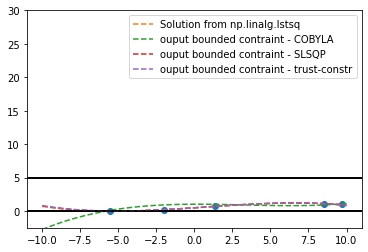

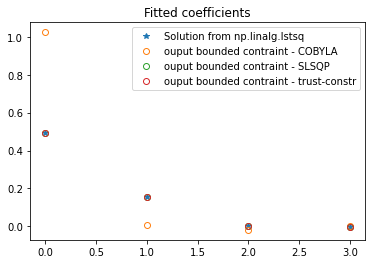

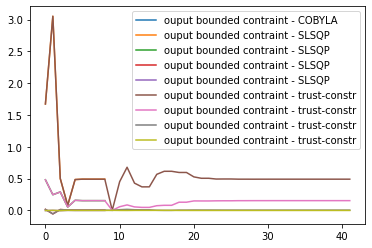

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
# from pyswarm import pso
from scipy import optimize



plt.figure(1)
plt.plot(x,y,'o')

def make_matrix(x,k = 6):
    a = list()
    for i in range(k):
        a.append(x ** i)
    a = np.array(a).T
    print(a.shape)
    return a
# a = np.vstack([x,np.ones(len(x))]).T

Korder = 4
a = make_matrix(x,Korder)
print(a)
from scipy.linalg import solve
x_solution = np.linalg.lstsq(a,y) #change this line
# print(x_solution,b)
# plt.plot(x, y, 'o', label='Original data', markersize=10)
# plt.plot(x, a*x_solution + b, 'r', label='Fitted line')
# plt.legend()
# plt.show()

c = x_solution[0]
plt.figure(2)
plt.title('Fitted coefficients')
plt.plot(c,'*',label='Solution from np.linalg.lstsq')
xtest = np.linspace(-10,10,101)
a = make_matrix(xtest, k=Korder)
ytest = a.dot(c)
plt.figure(1)
plt.plot(xtest,ytest,'--',label='Solution from np.linalg.lstsq')

###########################################

def norm2_sq(x,A,b):
  return np.linalg.norm(A.dot(x) - b)**2# ||Ax - b||^2

# solve argmin || Ax - b ||^2
A = make_matrix(x,k=Korder)
history = []
def save_xk(x):
  history.append(x)

def save_xk_trust_constr(x, state):
  history.append(x)

def plot_result(coeff, history, label):
  plt.figure(1)
  xtest = np.linspace(-10,10,101)
  Atest = make_matrix(xtest,Korder)
  plt.plot(xtest,Atest.dot(coeff),'--',label=label)
  plt.legend()
  plt.axhline(y=UB,c='k')
  plt.axhline(y=LB,c='k')
  low = -0.5 if LB == 0 else LB - np.abs(0.2*LB)
  hi = 0.5 if UB == 0 else UB + np.abs(0.2*UB)
  plt.ylim(5*np.array([low,hi]))
  plt.figure(2)
  plt.plot(coeff,'o',fillstyle='none',label=label)
  plt.legend()
  plt.figure(3)
  plt.plot(np.array(history),label=label)
  plt.legend()
# non-constraint
LB = 0 
UB = 5
# result = optimize.minimize(norm2_sq, x0 = np.zeros(Korder), method = 'Nelder-Mead', tol=1e-9, callback = save_xk, args = (A,y))
# plot_result(result['x'],history, 'optimize.minimize unconstraint')

# 1. output-contraint -1 < y = A*x < 1

from scipy.optimize import NonlinearConstraint
def output(x):
  global A
  return A.dot(x)
# ybound_constr = NonlinearConstraint(output,0,1)
# result = optimize.minimize(norm2_sq, x0 = np.zeros(Korder), method = 'trust-constr',tol=1e-9, callback = save_xk_trust_constr, args = (A,y), constraints=[ybound_constr])
# cf = result['x']
# plot_result(result['x'],history,'ouput bounded contraint - trust-constr')

# 2. output constraint
names = ['COBYLA', 'SLSQP','trust-constr']
for n in names:
  if n == 'trust-constr':
    y_constraints = [NonlinearConstraint(output,LB,UB)]
    cb = save_xk_trust_constr
  else:
    lower_bound = {'type': 'ineq',
              'fun' : lambda x: output(x)-LB
              }

    upper_bound = {'type': 'ineq',
              'fun' : lambda x: UB-output(x)
              }
    y_constraints = [lower_bound,upper_bound]
    cb = save_xk
  result = optimize.minimize(norm2_sq, x0 = np.zeros(Korder), method = n,tol=1e-9, callback = cb, args = (A,y), constraints=y_constraints)
  cf = result['x']
  plot_result(result['x'],history,'ouput bounded contraint - '+n)
  np.save('history_'+n+'.npy',np.array(history))
  np.save('coeff_'+n+'.npy',cf)

# 



(101, 4)
(101, 4)
(101, 4)


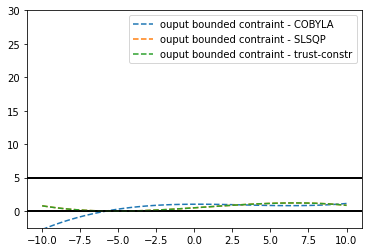

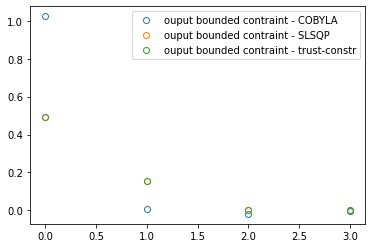

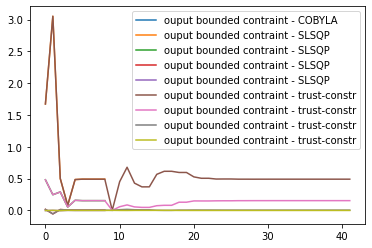

In [3]:
names = ['COBYLA', 'SLSQP','trust-constr']
for n in names:
  cf = np.load('coeff_'+n+'.npy')
  history = np.load('history_'+n+'.npy')
  plot_result(cf,history,'ouput bounded contraint - '+n)


In [4]:
import numpy as np
files = ['coeff_COBYLA','coeff_SLSQP','coeff_trust-constr','history_COBYLA','history_SLSQP','history_trust-constr']
for a in files:
  load = np.load(a+'.npy')
  print(a,"=",load)
  np.savetxt(a+".csv",load,delimiter = ",")

coeff_COBYLA = [ 1.02364766  0.00777088 -0.01836359  0.00187042]
coeff_SLSQP = [ 0.49026716  0.15278408  0.00332133 -0.00149462]
coeff_trust-constr = [ 0.4902862   0.15274343  0.00331797 -0.0014938 ]
history_COBYLA = []
history_SLSQP = [[ 1.67268292e+00  4.80942427e-01  1.53963487e-02 -3.06101744e-03]
 [ 3.05245532e+00  2.45802241e-01 -5.60323996e-02 -1.90587891e-04]
 [ 4.99927160e-01  2.89488455e-01  1.24114410e-02 -4.24601368e-03]
 [ 7.85859844e-02  5.17978884e-02  6.19405775e-03 -1.06816234e-04]
 [ 4.84511029e-01  1.58241009e-01  3.90776713e-03 -1.60016650e-03]
 [ 4.90452733e-01  1.52643348e-01  3.30808597e-03 -1.49134353e-03]
 [ 4.90172516e-01  1.52854421e-01  3.32785795e-03 -1.49628895e-03]
 [ 4.90267157e-01  1.52784085e-01  3.32133346e-03 -1.49462201e-03]
 [ 4.90267157e-01  1.52784085e-01  3.32133346e-03 -1.49462201e-03]]
history_trust-constr = [[ 1.67268292e+00  4.80942427e-01  1.53963487e-02 -3.06101744e-03]
 [ 3.05245532e+00  2.45802241e-01 -5.60323996e-02 -1.90587891e-04]
 [ 